# Project - 1
## Customer Service Requests Analysis.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# For removing the warning 
import warnings
warnings.filterwarnings('ignore')

## 1. Understand the dataset:

In [3]:
Cust_service = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [4]:
Cust_service.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# shape of the dataset 
Cust_service.shape 

(364558, 53)

In [6]:
# Variable with null value
Cust_service.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

## 2. Perform basic data exploratory analysis

In [7]:
# Drop of all column where highly data is null
Cust_service.drop(['School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 
                    'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name',
                   'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 'Intersection Street 2', 'Intersection Street 1'],
                   axis=1, inplace = True)

In [8]:
Cust_service.isna().apply(pd.value_counts).T

,False,True
Unique Key,364558.0,NaN
Created Date,364558.0,NaN
Closed Date,362177.0,2381.0
Agency,364558.0,NaN
Agency Name,364558.0,NaN
Complaint Type,364558.0,NaN
Descriptor,358057.0,6501.0
Location Type,364425.0,133.0
Incident Zip,361560.0,2998.0
Incident Address,312859.0,51699.0


In [9]:
Cust_service['School Code'].value_counts()

Unspecified    364557
Name: School Code, dtype: int64

In [10]:
Cust_service['School Region'].value_counts()

Unspecified    364557
Name: School Region, dtype: int64

In [11]:
Cust_service['School Zip'].value_counts()

Unspecified    364557
Name: School Zip, dtype: int64

In [12]:
Cust_service['Facility Type'].value_counts()

Precinct    362169
Name: Facility Type, dtype: int64

In [13]:
Cust_service['Agency Name'].value_counts()

New York City Police Department    364548
Internal Affairs Bureau                 8
NYPD                                    2
Name: Agency Name, dtype: int64

In [14]:
# Droping of the columns which has throught out same value 
Cust_service.drop(['School Region', 'School Code', 'School Zip', 'Facility Type', 'School Not Found', 'School State', 'School City',
                  'School Address', 'School Phone Number', 'School Number', 'School Name', 'Park Facility Name', 'Agency',
                  'Agency Name', 'Resolution Description'],
                   axis=1, inplace = True)

In [15]:
Cust_service.isna().apply(pd.value_counts).T

,False,True
Unique Key,364558.0,NaN
Created Date,364558.0,NaN
Closed Date,362177.0,2381.0
Complaint Type,364558.0,NaN
Descriptor,358057.0,6501.0
Location Type,364425.0,133.0
Incident Zip,361560.0,2998.0
Incident Address,312859.0,51699.0
Street Name,312859.0,51699.0
Cross Street 1,307370.0,57188.0


In [16]:
# Missing Value Treatment  
Cust_service.dropna(subset = ['Latitude', 'City', 'Address Type', 'Location Type','Resolution Action Updated Date',
                             'Due Date', 'Incident Zip'], inplace = True)

In [17]:
Cust_service.isna().apply(pd.value_counts).T

,False,True
Unique Key,360029.0,NaN
Created Date,360029.0,NaN
Closed Date,360012.0,17.0
Complaint Type,360029.0,NaN
Descriptor,353639.0,6390.0
Location Type,360029.0,NaN
Incident Zip,360029.0,NaN
Incident Address,308685.0,51344.0
Street Name,308685.0,51344.0
Cross Street 1,305555.0,54474.0


In [67]:
# Analysis of the date column and remove the entries if it has an incorrect timeline

In [19]:
Cust_service['Created Date'] = pd.to_datetime(Cust_service['Created Date'])

In [20]:
Cust_service['Closed Date'] = pd.to_datetime(Cust_service['Closed Date'], errors='coerce')

In [21]:
Cust_service = Cust_service[Cust_service['Closed Date'].notna()]

In [22]:
Cust_service.isna().apply(pd.value_counts).T

,False,True
Unique Key,360012.0,NaN
Created Date,360012.0,NaN
Closed Date,360012.0,NaN
Complaint Type,360012.0,NaN
Descriptor,353622.0,6390.0
Location Type,360012.0,NaN
Incident Zip,360012.0,NaN
Incident Address,308673.0,51339.0
Street Name,308673.0,51339.0
Cross Street 1,305544.0,54468.0


### 2.3 Draw a frequency plot for city-wise complaints

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
# Frequency plot for city-wise complaints
Cust_service['City'].value_counts()

BROOKLYN               118534
NEW YORK                76529
BRONX                   48979
STATEN ISLAND           15294
JAMAICA                  8899
ASTORIA                  7972
FLUSHING                 7472
RIDGEWOOD                6387
CORONA                   5377
WOODSIDE                 4347
EAST ELMHURST            3552
OZONE PARK               3443
ELMHURST                 3436
SOUTH RICHMOND HILL      3430
MASPETH                  3111
WOODHAVEN                3100
LONG ISLAND CITY         3017
SOUTH OZONE PARK         2662
FRESH MEADOWS            2445
RICHMOND HILL            2333
MIDDLE VILLAGE           2290
QUEENS VILLAGE           2249
FOREST HILLS             2117
JACKSON HEIGHTS          2105
REGO PARK                1804
BAYSIDE                  1543
COLLEGE POINT            1543
FAR ROCKAWAY             1396
WHITESTONE               1359
HOLLIS                   1227
HOWARD BEACH             1140
SPRINGFIELD GARDENS      1091
ROSEDALE                 1083
SAINT ALBA

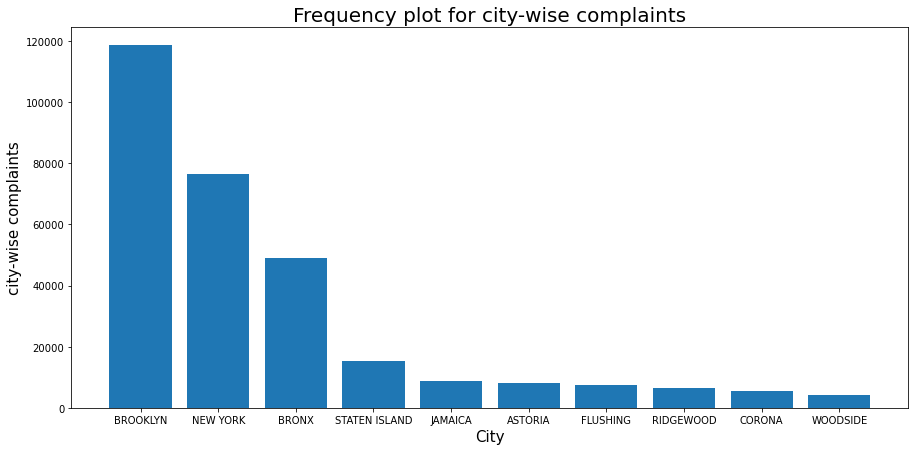

In [25]:
plt.figure(figsize= (15,7))
plt.bar(list(Cust_service['City'].value_counts()[0:10].keys()), list(Cust_service['City'].value_counts()[0:10]))
plt.title('Frequency plot for city-wise complaints', size = 20)
plt.xlabel('City', size = 15)
plt.ylabel('city-wise complaints', size = 15)
plt.show()

In [68]:
# To find out Complaint concentration acrross Brooklyn by scatter Type plot.

In [27]:
group_city = Cust_service.groupby('City')

In [28]:
Brooklyn_city = group_city.get_group('BROOKLYN')
Brooklyn_city

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,...,01/01/2016 07:56:30 AM,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,...,01/01/2016 07:53:58 AM,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,CRESCENT STREET,...,01/01/2016 07:47:58 AM,01/01/2016 08:18:47 AM,05 BROOKLYN,BROOKLYN,1019054.0,189780.0,BROOKLYN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,3 AVENUE,...,01/01/2016 07:44:52 AM,01/01/2016 12:36:10 AM,06 BROOKLYN,BROOKLYN,988846.0,186711.0,BROOKLYN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,EAST 46 STREET,...,01/01/2016 07:40:59 AM,01/01/2016 02:37:28 AM,18 BROOKLYN,BROOKLYN,1003628.0,163910.0,BROOKLYN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:55,2015-01-01 02:58:38,Blocked Driveway,No Access,Street/Sidewalk,11201.0,229 DUFFIELD STREET,DUFFIELD STREET,WILLOUGHBY STREET,...,01/01/2015 08:23:55 AM,01/01/2015 02:58:38 AM,02 BROOKLYN,BROOKLYN,988583.0,191117.0,BROOKLYN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)"
364541,29612697,2015-01-01 00:19:22,2015-01-01 02:41:10,Blocked Driveway,No Access,Street/Sidewalk,11211.0,27 HOPE STREET,HOPE STREET,ROEBLING STREET,...,01/01/2015 08:19:22 AM,01/01/2015 02:41:10 AM,01 BROOKLYN,BROOKLYN,996180.0,199268.0,BROOKLYN,40.713613,-73.956966,"(40.71361332917013, -73.95696623841229)"
364544,29613295,2015-01-01 00:17:48,2015-01-01 03:24:48,Noise - Commercial,Loud Music/Party,Store/Commercial,11217.0,242 FLATBUSH AVENUE,FLATBUSH AVENUE,BERGEN STREET,...,01/01/2015 08:17:48 AM,01/01/2015 03:24:48 AM,06 BROOKLYN,BROOKLYN,991249.0,187148.0,BROOKLYN,40.680352,-73.974766,"(40.68035202521423, -73.97476587888686)"
364545,29613456,2015-01-01 00:17:47,2015-01-01 00:51:13,Blocked Driveway,No Access,Street/Sidewalk,11237.0,1373 DECATUR STREET,DECATUR STREET,KNICKERBOCKER AVENUE,...,01/01/2015 08:17:47 AM,01/01/2015 12:51:13 AM,04 BROOKLYN,BROOKLYN,1010869.0,191545.0,BROOKLYN,40.692384,-73.904011,"(40.692383519190834, -73.90401080101479)"


In [29]:
Brooklyn_city['Location Type'].value_counts()

Street/Sidewalk               99010
Store/Commercial               8416
Club/Bar/Restaurant            5985
Residential Building/House     2646
Park/Playground                1737
House of Worship                387
Residential Building            186
House and Store                  70
Parking Lot                      41
Vacant Lot                       29
Commercial                       17
Subway Station                    6
Roadway Tunnel                    3
Highway                           1
Name: Location Type, dtype: int64

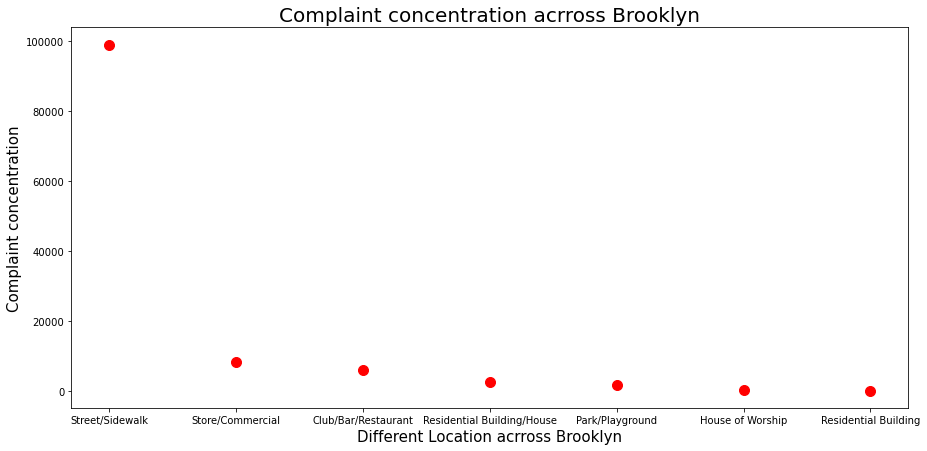

In [66]:
plt.figure(figsize= (15,7))
plt.scatter(list(Brooklyn_city['Location Type'].value_counts()[0:7].keys()),list(Brooklyn_city['Location Type'].value_counts()[0:7]), color='r', s= 100)
plt.title('Complaint concentration acrross Brooklyn', size = 20)
plt.xlabel('Different Location acrross Brooklyn', size = 15)
plt.ylabel('Complaint concentration', size = 15)
plt.show()

In [31]:
# To find out Complaint concentration acrross Brooklyn by hexbin Type plot.

(-74.0502496835082, -73.84649669313804, 40.563150823850876, 40.74729501421672)

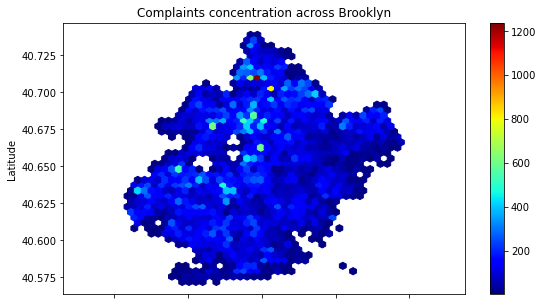

In [61]:
Brooklyn_city.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn', figsize=(9,5)).axis('equal')

## 3. Find major types of complaints:

In [35]:
# counts vs Complaint type bar garph representation
Cust_service['Complaint Type'].value_counts()

Blocked Driveway             100454
Illegal Parking               91056
Noise - Street/Sidewalk       50791
Noise - Commercial            43623
Derelict Vehicle              21405
Noise - Vehicle               19122
Animal Abuse                  10500
Traffic                        4908
Homeless Encampment            4796
Vending                        4162
Noise - Park                   3994
Drinking                       1399
Noise - House of Worship       1059
Posting Advertisement           678
Urinating in Public             640
Bike/Roller/Skate Chronic       463
Panhandling                     320
Disorderly Youth                314
Illegal Fireworks               167
Graffiti                        157
Squeegee                          4
Name: Complaint Type, dtype: int64

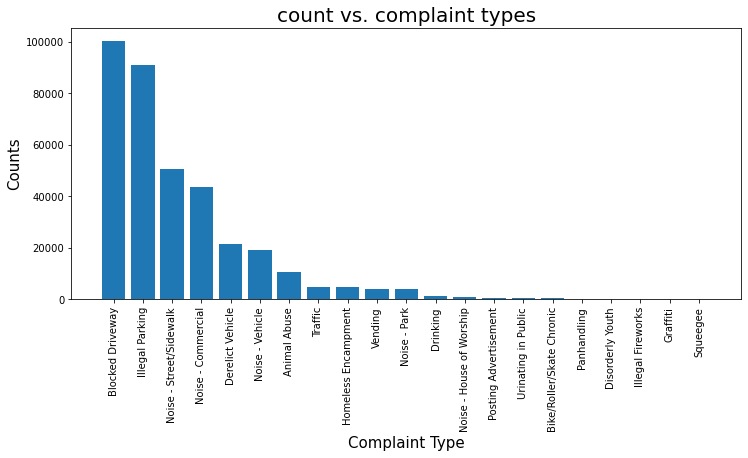

In [54]:
plt.figure(figsize= (12,5))
plt.bar(list(Cust_service['Complaint Type'].value_counts()[0:].keys()), list(Cust_service['Complaint Type'].value_counts()[0:]))
plt.title('count vs. complaint types', size = 20)
plt.xlabel('Complaint Type', size = 15)
plt.xticks(rotation = 90)
plt.ylabel('Counts', size = 15)
plt.show()

In [37]:
# top 10 types of complaints
Cust_service['Complaint Type'].value_counts()[0:10]

Blocked Driveway           100454
Illegal Parking             91056
Noise - Street/Sidewalk     50791
Noise - Commercial          43623
Derelict Vehicle            21405
Noise - Vehicle             19122
Animal Abuse                10500
Traffic                      4908
Homeless Encampment          4796
Vending                      4162
Name: Complaint Type, dtype: int64

In [38]:
# types of complaints in each city in a separate dataset
sep_dataset = Cust_service[['Complaint Type','City']]
sep_dataset

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


## 4. Visualize the major types of complaints in each city

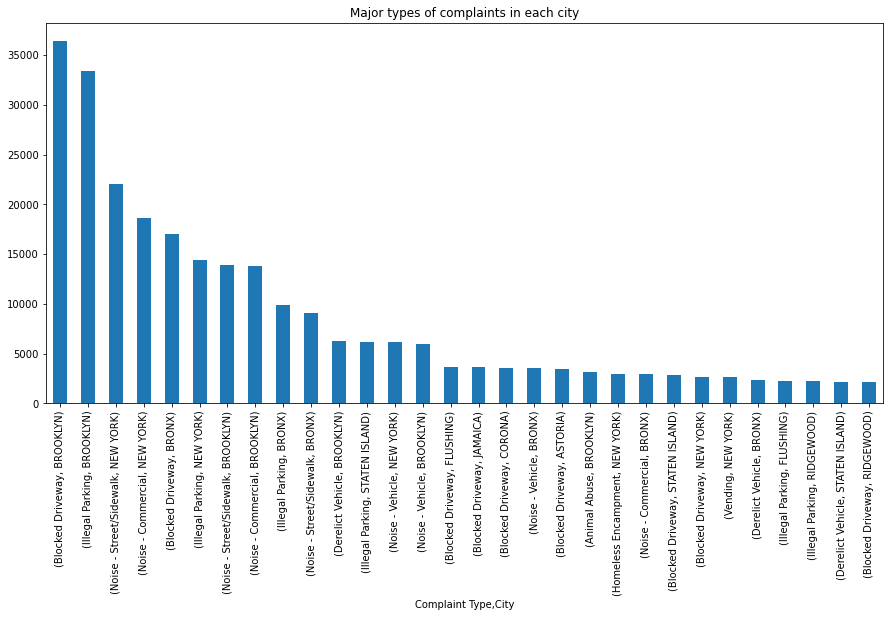

In [39]:
plt.figure(figsize=(15,7))
sep_dataset.value_counts().head(30).plot(kind='bar',title='Major types of complaints in each city')
plt.show()

## 5. Check if the average response time across various types of complaints

In [40]:
Cust_service['Resolution Action Updated Date'] = pd.to_datetime(Cust_service['Resolution Action Updated Date'])

In [41]:
Response_time = Cust_service['Resolution Action Updated Date'] - Cust_service['Created Date']

In [42]:
np.mean(Response_time)

Timedelta('0 days 04:11:09.434571625')